In [59]:
import numpy as np
import pandas as pd

# K-Means

In [60]:
# part A ~ K-Means Clustering

def init_centroid(X, k):
    """
    Randomly initialize k centroids by selecting k distinct points from X
    """
    np.random.seed(42) 
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]


def assign_samples(X, centroids):
    """
    Assign each sample in X to the nearest centroid - like 1-NN
    """
    dists = np.linalg.norm(X[:, np.newaxis] - centroids[np.newaxis, :], axis=2)
    return np.argmin(dists, axis=1)


def centroid_calc(X, labels, k):
    """
    compute new centroids as the mean of points assigned to each cluster
    if a cluster has no members, reinitialize it to a random data point
    """
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        if np.any(labels == i):  # avoid empty clusters
            centroids[i] = X[labels == i].mean(axis=0)
        else:
            centroids[i] = X[np.random.choice(X.shape[0])]  # reinitialize if empty
    return centroids


def clustering_error(X, assignments, centroids):
    """
    Compute the average squared distance of each point to its assigned centroid.
    """
    sq_dists = np.sum((X - centroids[assignments])**2, axis=1)
    return sq_dists.mean()


def k_means(X, k, max_iters=100, threshold=1e-4, seed=None):
    """
    Run k-means clustering and track error using clustering_error.
    Returns:
      centroids: final (k × n_features) array
      assignments: final cluster labels for each sample
      error_history: list of avg squared errors per iteration
    """
    seed = seed if seed is not None else np.random.randint(0, 99999)
    np.random.seed(seed)
    
    
    centroids = init_centroid(X, k)
    error_history = []
    assignments = np.zeros(X.shape[0], dtype=int)

    for itr in range(max_iters):
        assignments = assign_samples(X, centroids)
        new_centroids = centroid_calc(X, assignments, k)

        # compute and record the clustering error
        avg_error = clustering_error(X, assignments, new_centroids)
        error_history.append(avg_error)

        # check convergence
        if itr > 0 and abs(error_history[-1] - error_history[-2]) < threshold:
            break

        centroids = new_centroids

    return centroids, assignments, error_history

In [61]:
# part B ~ run K-Means on the penguin dataset for 2 features
df = pd.read_csv('data\\penguin.csv')   
X_all = df[['flipper_length_mm','culmen_depth_mm']].dropna().values
centroids, assignments, error_history = k_means(X_all, k=3)

print("Final centroids:\n", centroids)
print("Error history (last 5 iters):", error_history[-5:])

Final centroids:
 [[186.25438596  17.99035088]
 [196.95098039  18.67352941]
 [216.9609375   15.18828125]]
Error history (last 5 iters): [np.float64(26.671461000610527), np.float64(26.599223861806855), np.float64(26.55064189774208), np.float64(26.52096724921513), np.float64(26.52096724921513)]


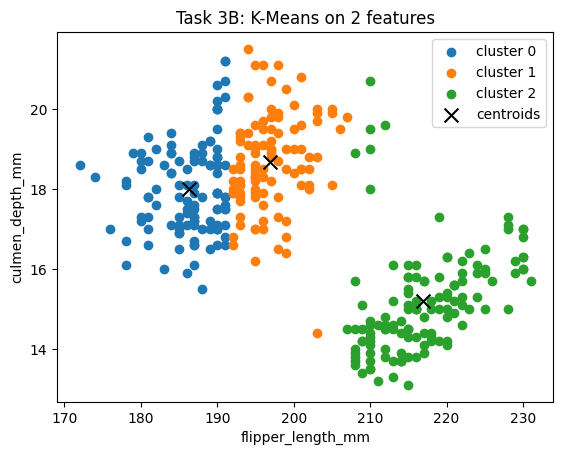

In [62]:
plt.figure()
for i in range(3):
    mask = assignments == i
    plt.scatter(
        X_all[mask,0], X_all[mask,1],
        label=f'cluster {i}'
    )
plt.scatter(
    centroids[:,0], centroids[:,1],
    marker='x', s=100, c='k', label='centroids'
)
plt.xlabel('flipper_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('Task 3B: K-Means on 2 features')
plt.legend()
plt.show()

Final centroids:
 [[  41.00342466   17.93082192  189.49315068 3463.18493151]
 [  44.26923077   17.38717949  201.8034188  4314.74358974]
 [  48.61111111   15.40123457  219.95061728 5359.87654321]]
Error history (last 5 iters): [np.float64(92347.21727500968), np.float64(89428.40777362417), np.float64(87424.36351510313), np.float64(86867.26105724303), np.float64(86867.26105724303)] 




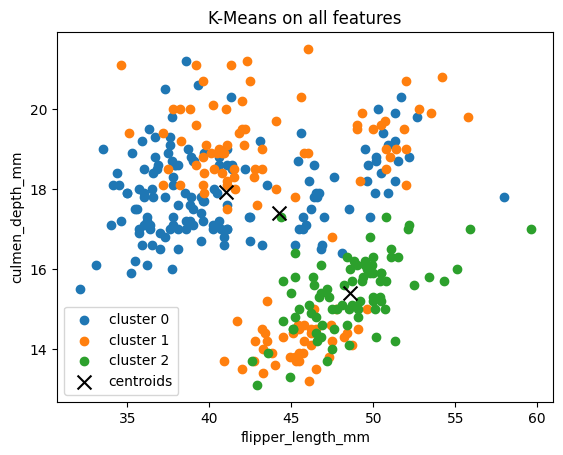

In [69]:
# part C ~ run K-Means on the penguin dataset for all features
feature_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X_all = df[feature_cols].dropna().values
centroids, assignments, error_history = k_means(X_all, k=3)

print("Final centroids:\n", centroids)
print("Error history (last 5 iters):", error_history[-5:], '\n\n')    

plt.figure()
for i in range(3):
    mask = assignments == i
    plt.scatter( X_all[mask,0], X_all[mask,1],label=f'cluster {i}')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100, c='k', label='centroids')

plt.xlabel('flipper_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('K-Means on all features')
plt.legend()
plt.show() 

Min–max normalized centroids:
 [[0.55090909 0.6853355  0.42815871 0.34438131]
 [0.22777854 0.58646617 0.27322544 0.23903509]
 [0.56017738 0.22406117 0.76588122 0.66000452]]
Error history (last 5 iters): [np.float64(0.05522731838330044), np.float64(0.05495553292555451), np.float64(0.05454550247152152), np.float64(0.054428056904147225), np.float64(0.05437309166461197)]


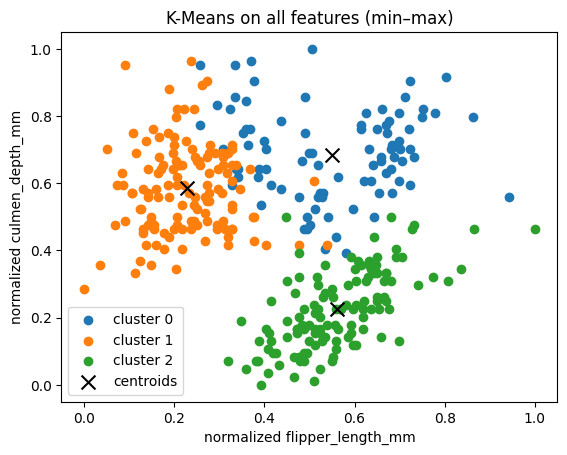

In [70]:
# used min–max normalize each feature into [0,1] so that dimensions
# (e.g. body_mass) with large numeric ranges don’t dominate the Euclidean
# distance in k-means. All features contribute equally after scaling.

X_minmax = (X_all - X_all.min(axis=0)) / (X_all.max(axis=0) - X_all.min(axis=0))
centroids, assignments, error_history = k_means(X_minmax, k=3)

print("Min–max normalized centroids:\n", centroids)
print("Error history (last 5 iters):", error_history[-5:])  

plt.figure()
for i in range(3):
    mask = assignments == i
    plt.scatter( X_minmax[mask,0], X_minmax[mask,1],label=f'cluster {i}')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100, c='k', label='centroids')

plt.xlabel('normalized flipper_length_mm')
plt.ylabel('normalized culmen_depth_mm')
plt.title('K-Means on all features (min–max)')
plt.legend()
plt.show()